DENSE LABEL [[15  4  0 10 18]]
DENSE LABEL i [15  4  0 10 18]
***Label ['P', 'E', 'A', 'K', 'S']
image shape (32, 100, 3)


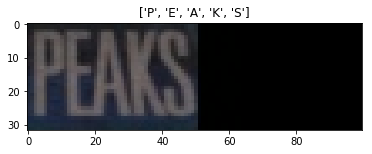

DENSE LABEL [[18  8  6 13]]
DENSE LABEL i [18  8  6 13]
***Label ['S', 'I', 'G', 'N']
image shape (32, 100, 3)


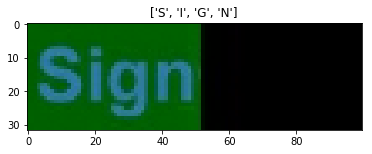

DENSE LABEL [[20]]
DENSE LABEL i [20]
***Label ['U']
image shape (32, 100, 3)


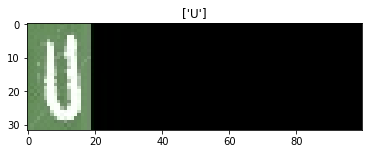

DENSE LABEL [[ 9 20 13 10]]
DENSE LABEL i [ 9 20 13 10]
***Label ['J', 'U', 'N', 'K']
image shape (32, 100, 3)


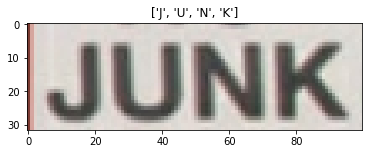

DENSE LABEL [[ 5 14 17  4 21  4 17]]
DENSE LABEL i [ 5 14 17  4 21  4 17]
***Label ['F', 'O', 'R', 'E', 'V', 'E', 'R']
image shape (32, 100, 3)


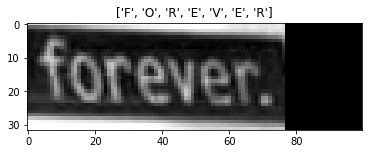

DENSE LABEL [[0]]
DENSE LABEL i [0]
***Label ['A']
image shape (32, 100, 3)


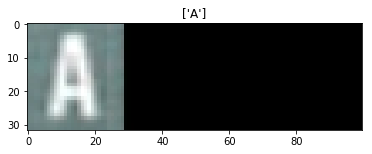

DENSE LABEL [[15 14  8 13 19]]
DENSE LABEL i [15 14  8 13 19]
***Label ['P', 'O', 'I', 'N', 'T']
image shape (32, 100, 3)


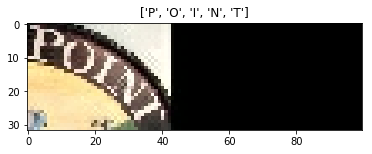

DENSE LABEL [[11  0]]
DENSE LABEL i [11  0]
***Label ['L', 'A']
image shape (32, 100, 3)


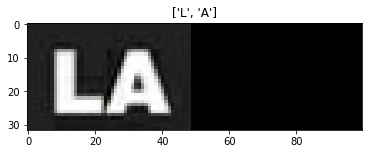

DENSE LABEL [[19  7  4 17  4 18]]
DENSE LABEL i [19  7  4 17  4 18]
***Label ['T', 'H', 'E', 'R', 'E', 'S']
image shape (32, 100, 3)


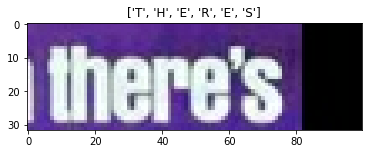

DENSE LABEL [[21  8  4 22]]
DENSE LABEL i [21  8  4 22]
***Label ['V', 'I', 'E', 'W']
image shape (32, 100, 3)


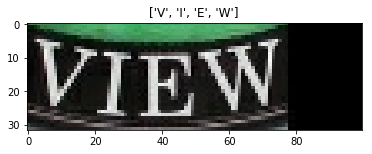

In [70]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from data_utils import *
from dataset_helper import *
import argparse

#data_path = '/home/dataj/ICDAR2003_sample2/'
#data_path = '/home/dataj/data/valtfrecords/ICDAR2003_sample2/'
#data_path = '/home/dataj/SynthTf10kNew/'
#data_path = '/home/dataj/SynthTfAll/'
#data_path = '/home/dataj/data/valtfrecords/ICDAR2003_train/'
#data_path = '/home/dataj/data/valtfrecords/IIIT5K_test'

# Good ones
#data_path = '/home/dataj/data/Synth10ktest'
#data_path ='/home/dataj/data/vertf/ICDAR2003_sample'
#data_path ='/home/dataj/data/vertf/ICDAR2003_test'
#data_path ='/home/dataj/data/vertf/ICDAR2003_train'
#data_path ='/home/dataj/data/vertf/ICDAR2013_test'
#data_path ='/home/dataj/data/vertf/ICDAR2013_train'
data_path ='/home/dataj/data/vertf/IIIT5K_test'
#data_path ='/home/dataj/data/vertf/IIIT5K_train'

data_file = os.path.join(data_path,'train.tfrecords')  # address to save the hdf5 file

tf_format = 'JPG'
#tf_format = 'RAW'

batch_size = 1
with tf.Graph().as_default():
    image_batch, label_batch = input_fn(data_file, train=True, batch_size=batch_size, buffer_size=2048,
                                        tf_format=tf_format)

    with tf.Session() as sess:
        init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
        sess.run(init_op)
        for batch in range(10):

            images, labels = sess.run([image_batch, label_batch])
            dense_label = sess.run(tf.sparse_to_dense(labels.indices, labels.dense_shape, labels.values, default_value=-1))
            print("DENSE LABEL",dense_label)
            for i in range(batch_size):
                image_i = images['image'][i]
                print("DENSE LABEL i", dense_label[i])
                label = [idx2char(c) for c in dense_label[i]]
                print("***Label", label)
                image_i = image_i.astype(np.uint8)
                print("image shape", image_i.shape)
                plt.imshow(image_i)
                plt.title(label)
                plt.show()
